# Perceptron Learning

Your task is to implement the Perceptron Learning Algoritm (PLA) and the Pocket algorithm (p. 80 of LFD).  Then try them on some small "toy" datasets as well as some larger "real" datasets.

Your perceptron implementation should work for inputs of arbitrary dimensionality.  However, some of the plots below only make sense when $d=2$.

## Implementing Learning Algorithms

Open `perceptron.py` and implement the functions defined there.  Feel free to test them as you go on the examples below.

**TODO**: implement methods in `perceptron.py`.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

## Demonstrate your PLA implementation

Show that your PLA implementation works on this small dataset.  Visualize the results.

**TODO**: implement methods in `viz.py`.

In [2]:
# example data set, organized by "column"
years = [5, 0.25, 2, 3, 1, 5, 0]
salary = [35, 60, 50, 25, 35, 10, 10]
credit = [1, 1, 1, -1, -1, -1, -1]

In [3]:
X = list(zip(years, salary))
y = credit

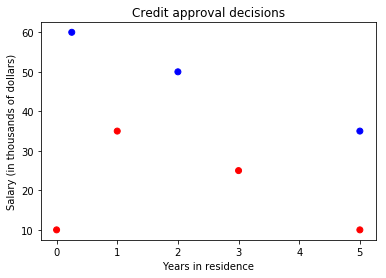

In [4]:
# add labels, adjust axis limits, etc.
colormap = {1 : 'b', -1: 'r'}
colors = [colormap[cred] for cred in credit]
plt.scatter(years, salary, c=colors)
plt.xlabel('Years in residence')
plt.ylabel('Salary (in thousands of dollars)')
plt.title('Credit approval decisions')
plt.show()

In [5]:
from perceptron import pla, pocket, error_function, test_function
from viz import plot_perceptron

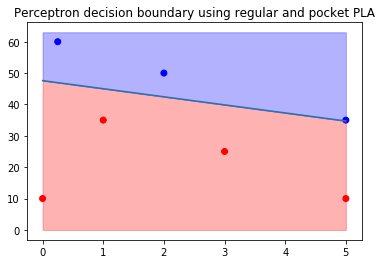

In [78]:
# TODO: add a demonstration here
w, Ws = pla(X,y,10000)
pocket_w, pocket_Ws = pocket(X,y,10000)
plot_perceptron(X,y,w,"Perceptron decision boundary using regular and pocket PLA")

# Digit classification

In this assignment you will apply your perceptron learning algortihms to classify
hand-written digits and run a few experiments. The file ``ones-fives-digits-py.mat``
is a data file containing the data set, which is split into a
training set with 200 examples, and a test set with 194 examples.

You can import the data as a Python dictionary like this:
``` .python
data = scipy.io.loadmat('ones-fives-digits-py.mat')
```

The code in the cell below first does some setup and then imports the data
into the following variables for training and test data:

* ``X_train`` - 2d array shape 220 x 400
* ``y_train`` - 1d array shape 200
* ``X_test`` - 2d array shape 194 x 400
* ``y_test`` - 1d array shape 194

In [90]:
import scipy.io
data = scipy.io.loadmat('ones-fives-digits-py.mat')
X_train = data['X_train']
y_train = data['y_train'].ravel()
X_test  = data['X_test']
y_test  = data['y_test'].ravel()

### Visualize the input

Once you have loaded the data, it is helpful to understand how it represents images. 
Each row of ``X_train`` and ``X_test`` represents a 20 x 20 image as a vector of length 400 
containing the pixel intensity values. To see the original image, you can reshape one row of 
the train or test data into a 20 x 20 matrix and then visualize it using the matlplotlib 
``imshow`` command. 

Write code using ``np.reshape`` and ``plt.imshow`` to display the 100th training example as 
an image. (Hint: use ``cmap='gray'`` in ``plt.imshow`` to view as a grayscale image.)

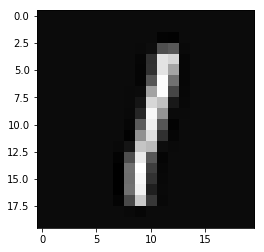

In [91]:
idx = 7# you can change to see different inputs from the dataset
img = X_train[idx].reshape(20,20)  
plt.imshow(img, cmap='gray')

### Featurize the input

Write some code to convert the 400 image pixels into features that will be useful for classification.  You are free to design whatever features you like (though the book has some useful suggestions).

You can create more than two features, but ultimately you should select the two most useful features for visualizing below.

**TODO**: implement ``featurize`` in ``perceptron.py``.

In [92]:
from perceptron import featurize
import time

The following lines will apply your `featurize` function to each input in the training and test datasets.

In [93]:
# you should not need to modify these lines
X_train = np.apply_along_axis(featurize, 1, X_train)
X_test = np.apply_along_axis(featurize, 1, X_test)

### Compare PLA vs. Pocket

Run your perceptron algorithms on the featurized data.  In the space below, present a thorough comparison of the algorithms.  You have some flexiblity here on your presentation, but some suggestions are:

- Visualize the data and the perceptron boundary (repeat for each algorithm, PLA and pocket)
- Plot how error, both $E_{in}$ and $E_{out}$ changes with each iteration (repeat for each algorithm, PLA and pocket)
- Compare the algorithms in terms of both runtime and accuracy.

For visualizations, you may want to look at Fig. 3.2 (p. 83) of LFD for inspiration.

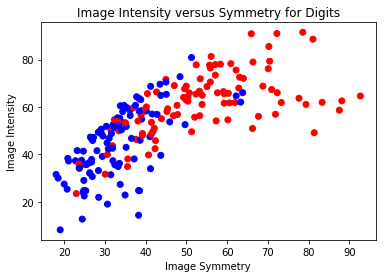

In [94]:
# visualize data
colormap = {1 : 'b', -1: 'r'}
colors = [colormap[label] for label in y_train]
plt.title('Image Intensity versus Symmetry for Digits')
plt.ylabel('Image Intensity')
plt.xlabel('Image Symmetry')
plt.scatter(X_train[:,0], X_train[:,1],c=colors)
plt.show()

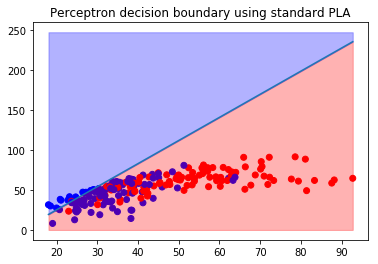

In [95]:
## regular PLA
w, Ws = pla(X_train,y_train,10000)
t1 = time.clock()
plot_perceptron(X_train,y_train,w,"Perceptron decision boundary using standard PLA")
pla_runtime = time.clock() - t1

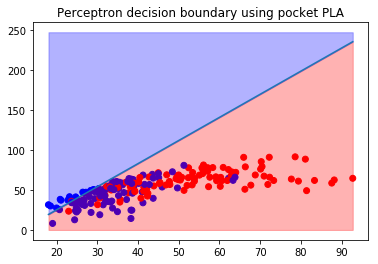

In [96]:
## pocket PLA
pocket_w, pocket_Ws = pocket(X_train,y_train,10000)
t1 = time.clock()
plot_perceptron(X_train,y_train,w,"Perceptron decision boundary using pocket PLA")
pocket_runtime = time.clock() - t1

In [97]:
from functools import partial
## calculate errors
in_error = partial(error_function, X = X_train, y = y_train)
out_error = partial(error_function, X = X_test, y = y_test)
e_in_pla = np.apply_along_axis(in_error, 1, arr=Ws)
e_out_pla = np.apply_along_axis(out_error, 1, arr=Ws)
e_in_pocket = np.apply_along_axis(in_error, 1, arr=pocket_Ws)
e_out_pocket = np.apply_along_axis(out_error, 1, arr=pocket_Ws)
iterations = range(len(e_in_pla))

Text(0,0.5,'Error')

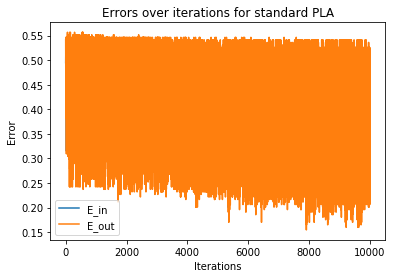

In [98]:
## plot PLA errors
plt.plot(range(len(e_in_pla)),e_in_pla)
plt.plot(range(len(e_out_pla)),e_out_pla)
plt.legend(['E_in','E_out'])
plt.title("Errors over iterations for standard PLA")
plt.xlabel("Iterations")
plt.ylabel("Error")

Text(0,0.5,'Error')

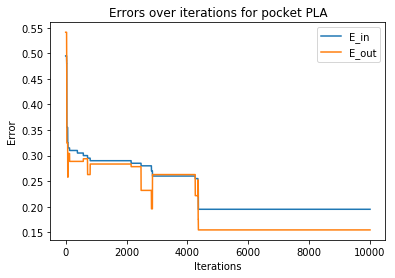

In [103]:
## plot pocket errors
plt.plot(e_in_pocket)
plt.plot(e_out_pocket)
plt.legend(['E_in','E_out'])
plt.title("Errors over iterations for pocket PLA")
plt.xlabel("Iterations")
plt.ylabel("Error")

Text(0.5,1,'Out-of-sample accuracy')

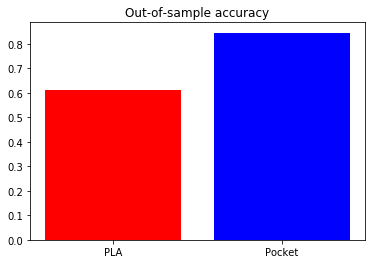

In [104]:
## compare accuracy
pla_acc =  1 - out_error(w)
pocket_acc = 1 - out_error(pocket_w)
acc = [pla_acc,pocket_acc]
plt.bar(("PLA","Pocket"),acc, color = ("r","b"))
plt.title("Out-of-sample accuracy")


Text(0.5,1,'Runtime in seconds')

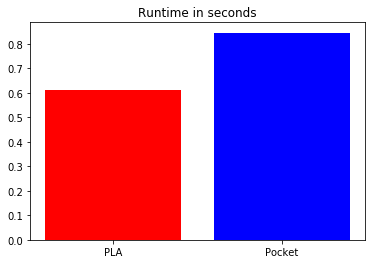

In [105]:
## compare runtime
runtime = [pla_runtime,pocket_runtime]
plt.bar(("PLA","Pocket"),acc, color = ("r","b"))
plt.title("Runtime in seconds")